<a href="https://colab.research.google.com/github/PriyamShah1/run/blob/master/Traffic_Sign_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
np.random.seed(0)
import random
import pickle
import pandas as pd

Using TensorFlow backend.


In [0]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  valid_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)
  
X_train, y_train = train_data['features'],train_data['labels']
X_valid, y_valid = valid_data['features'],valid_data['labels']
X_test, y_test = test_data['features'],test_data['labels']

In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

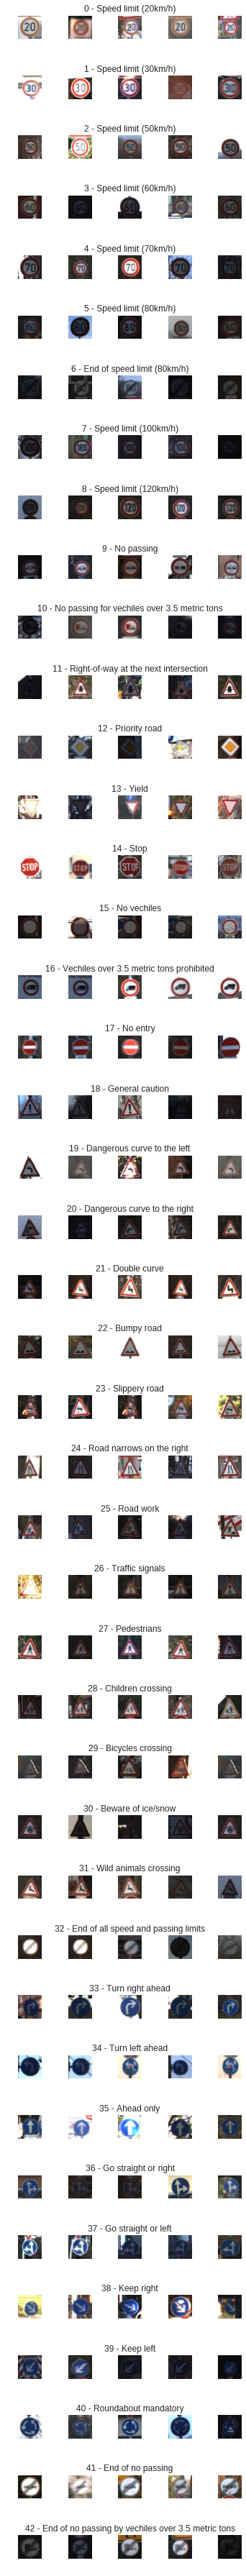

In [0]:
  num_of_samples=[]
 
  cols = 5
  num_classes = 43
 
  fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
  fig.tight_layout()
 
  for i in range(cols):
      for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0,0.5,'Number of images')

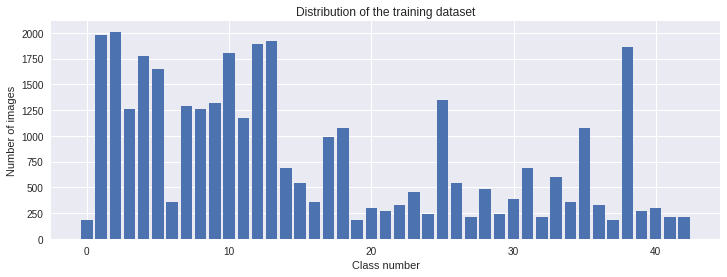

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(-0.5, 31.5, 31.5, -0.5)

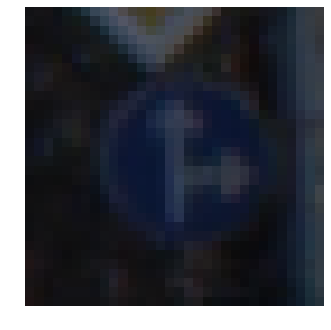

In [0]:
import cv2
plt.imshow(X_train[1000])
plt.axis("off")

In [0]:
def grayscale(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

In [0]:
#gray_image = grayscale(X_train[1000])

In [0]:
def equalize(img):
  img  = cv2.equalizeHist(img)
  return img


In [0]:
#equalized_image = equalize(gray_image)

In [0]:
def preprocessing(image):
  image = grayscale(image)
  image = equalize(image)
  image = image / 255
  return image

In [0]:
X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_valid = np.array(list(map(preprocessing, X_valid)))


In [0]:
X_train = X_train.reshape(34799,32,32,1)
X_test = X_test.reshape(12630,32,32,1)
X_valid = X_valid.reshape(4410,32,32,1)

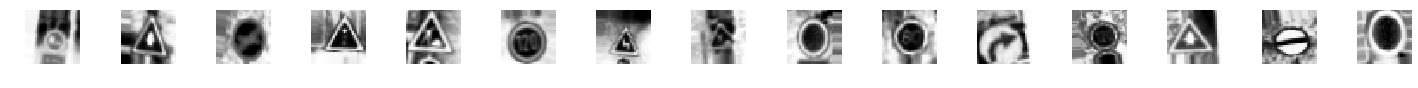

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(X_train)
# for X_batch, y_batch in
 
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)
 
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 

In [0]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_valid = to_categorical(y_valid,43)

In [0]:
def LeNet():
  model = Sequential()
  model.add(Conv2D(60,(5,5),activation = 'relu',input_shape = (32,32,1)))
  model.add(Conv2D(60,(5,5),activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(Conv2D(30,(3,3),activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(.5))
  model.add(Flatten())
  model.add(Dense(500,activation = 'relu'))
  model.add(Dropout(.5))
  model.add(Dense(43,activation = 'softmax'))
  model.compile(Adam(lr = .001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [0]:
model = LeNet()
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_valid, y_valid), shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 51s 25ms/step - loss: 1.1557 - acc: 0.6576 - val_loss: 0.1123 - val_acc: 0.9673
Epoch 2/10
2000/2000 [==============================] - 49s 25ms/step - loss: 0.3856 - acc: 0.8785 - val_loss: 0.0545 - val_acc: 0.9819
Epoch 3/10
2000/2000 [==============================] - 49s 24ms/step - loss: 0.2681 - acc: 0.9154 - val_loss: 0.0426 - val_acc: 0.9855
Epoch 4/10
2000/2000 [==============================] - 51s 26ms/step - loss: 0.2126 - acc: 0.9334 - val_loss: 0.0374 - val_acc: 0.9875
Epoch 5/10
2000/2000 [==============================] - 52s 26ms/step - loss: 0.1864 - acc: 0.9421 - val_loss: 0.0318 - val_acc: 0.9896
Epoch 6/10
2000/2000 [==============================] - 52s 26ms/step - loss: 0.1563 - acc: 0.9520 - val_loss: 0.0251 - val_acc: 0.9918
Epoch 7/10
2000/2000 [==============================] - 52s 26ms/step - loss: 0.1487 - acc: 0.9545 - val_loss: 0.0253 - val_acc: 0.9925
Epoch 8/10
2000/2000 [==========================

(32, 32)
predicted sign: [13]


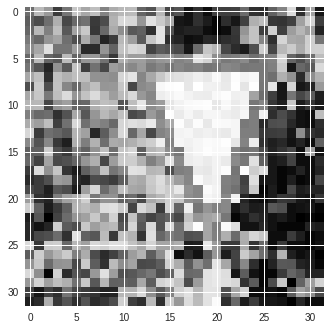

In [0]:

import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
 
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))
